A Tour & Travels Company Wants To Predict Whether A Customer Will Churn Or Not Based On Indicators Given Below.
Help Build Predictive Models And Save The Company's Money.

Goals: TravelCustomerChurn_Analysis

# LIBRARY

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.19.5
pandas version :  1.1.5
seaborn version :  0.11.2


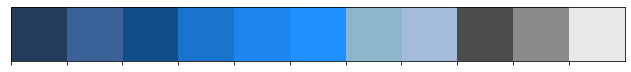

In [2]:
flatui = ["#243c5d","#3b6298","#104E8B","#1874CD","#1C86EE","#1E90FF", "#8DB6CD","#a4bbdb","#4c4c4c", "#8a8a8a", "#e8e8e8" ] #Membuat Color Palette
sns.set_palette(flatui)
sns.palplot(sns.color_palette())

# DATA PRE-PROCESSING

In [3]:
# Memanggil data yang digunakan dalam file csv
df = pd.read_csv('Customertravel.csv')
df.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0


In [4]:
# target merupakan data yang digunakan untuk menganalisis apakah pelanggan kemungkinan churn atau tidak churn
df['Target'].value_counts()

0    730
1    224
Name: Target, dtype: int64

In [5]:
# menghitung rata-rata churn rate dimana target sama dengan 1
churn_rate = df[df['Target']==1].shape[0] *100 / df.shape[0]
print('Churn Rate: ', churn_rate,'%')


Churn Rate:  23.48008385744235 %


In [6]:
# mengetahui informasi data terkait jumlah baris dan kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         954 non-null    int64 
 1   FrequentFlyer               954 non-null    object
 2   AnnualIncomeClass           954 non-null    object
 3   ServicesOpted               954 non-null    int64 
 4   AccountSyncedToSocialMedia  954 non-null    object
 5   BookedHotelOrNot            954 non-null    object
 6   Target                      954 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 52.3+ KB


In [7]:
# mengecheck apakah terdapat missing value pada data
df.isna().sum().sort_values(ascending=False)

Target                        0
BookedHotelOrNot              0
AccountSyncedToSocialMedia    0
ServicesOpted                 0
AnnualIncomeClass             0
FrequentFlyer                 0
Age                           0
dtype: int64

In [8]:
# membuat dua klasifikasi data numerikal dan kategorikal
cats= ['FrequentFlyer','AnnualIncomeClass','AccountSyncedToSocialMedia','BookedHotelOrNot']
nums= ['Age','ServicesOpted','Target']

In [9]:
df[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,954.0,32.109015,3.337388,27.0,30.0,31.0,35.0,38.0
ServicesOpted,954.0,2.437107,1.606233,1.0,1.0,2.0,4.0,6.0
Target,954.0,0.234801,0.424097,0.0,0.0,0.0,0.0,1.0


In [10]:
df[cats].describe().T

,count,unique,top,freq
FrequentFlyer,954,3,No,608
AnnualIncomeClass,954,3,Middle Income,409
AccountSyncedToSocialMedia,954,2,No,594
BookedHotelOrNot,954,2,No,576


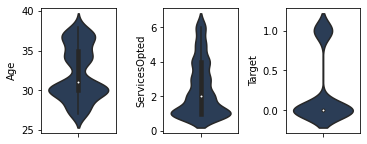

In [11]:
# melihat outlier pada data
plt.figure(figsize = (12,4))
for i in range(0, len(nums)):
    plt.subplot(2, 7, i+1)
    sns.violinplot(y = df[nums[i]], orient='v')
    plt.tight_layout()

# EXPLORATORY DATA ANALYSIS


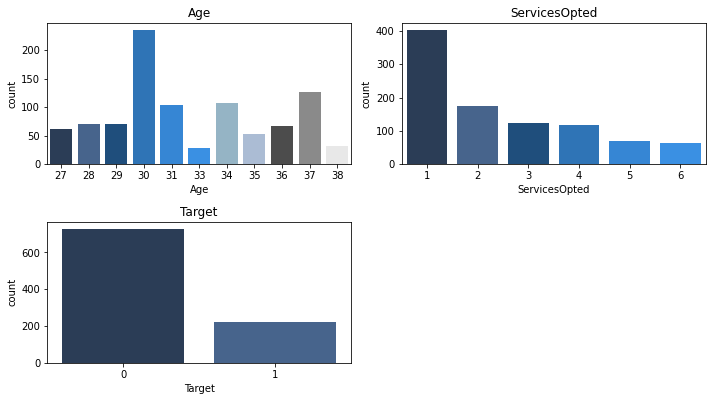

In [12]:
# mengetahui distribusi data numerikal 
plt.figure(figsize=(10,8))
for i,column in enumerate(nums):
    plt.subplot(len(nums), 2, i+1)
    sns.countplot(data=df, x=column)
    plt.title(f"{column}")
    plt.tight_layout()

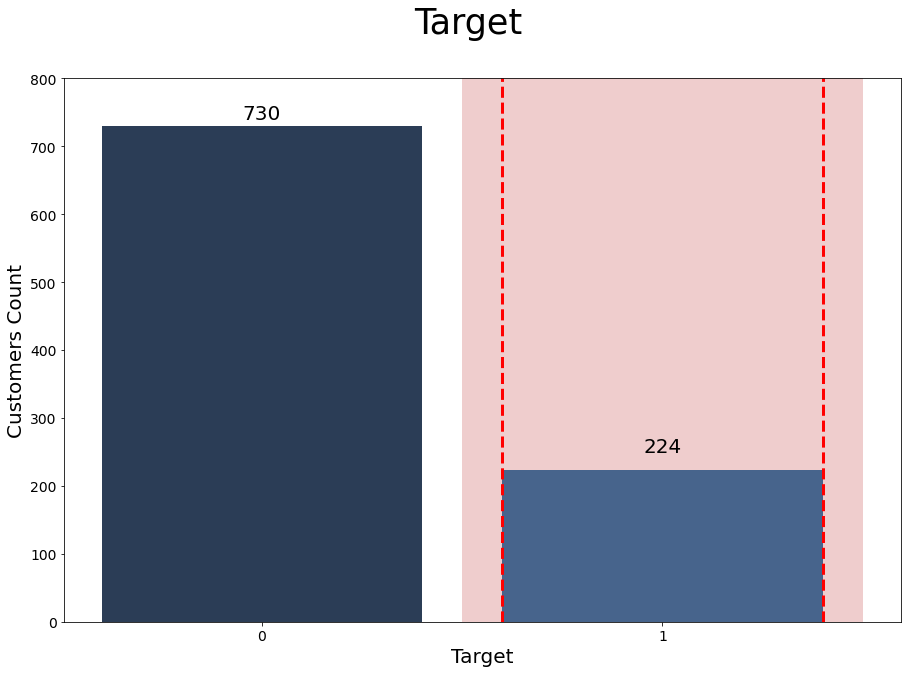

In [13]:
plt.figure(figsize=(15,10))
sns.countplot(x='Target', data=df)

plt.suptitle("Target", fontsize=35)
plt.ylabel('Customers Count', fontsize=20) # x axis label
plt.xlabel('Target', fontsize=20) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14);

# add label
plt.text(x = 0, y = 740, s = "730", ha='center',fontsize = 20)
plt.text(x = 1, y = 250, s = "224", ha='center',fontsize = 20)

plt.ylim(0,800)
plt.stackplot(np.arange(0.5, 1.6 ,), [[800]], colors=('indianred',), alpha=0.3)
plt.axvline(x=0.6, color='red', linestyle='--', linewidth=3)
plt.axvline(x=1.4, color='red', linestyle='--', linewidth=3)

dari hasil diatas dapat memberikan informasi:
1. kebanyakan pelanggan di perusahaan tour and travels berada pada usia 30-an
2. layanan yang dipilih selama beberapa tahun terakhir adalah 'satu'
3. visualisasi target menunjukkan distribusi pelanggan kemungkinan churn yang lebih sedikit dibandingkan tidak churn, yang artinya terdapat banyak pelanggan yang loyal terhadap perusahaan. akan tetapi penting bagi perusahaan untuk mengurangi potensi pelanggan churn sehingga dapat memberikan keuntungan bagi perusahaan. 

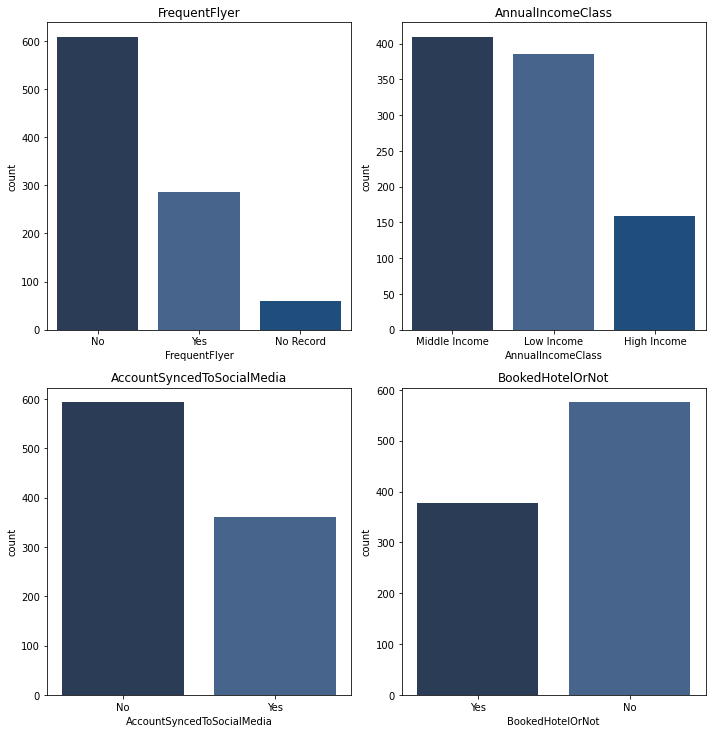

In [14]:
# mengetahu distribusi data kategorical
plt.figure(figsize=(10,20))
for i,column in enumerate(cats):
    plt.subplot(len(cats), 2, i+1)
    sns.countplot(data=df, x=column)
    plt.title(f"{column}")
    plt.tight_layout()

### Distribusi feature terhadap target

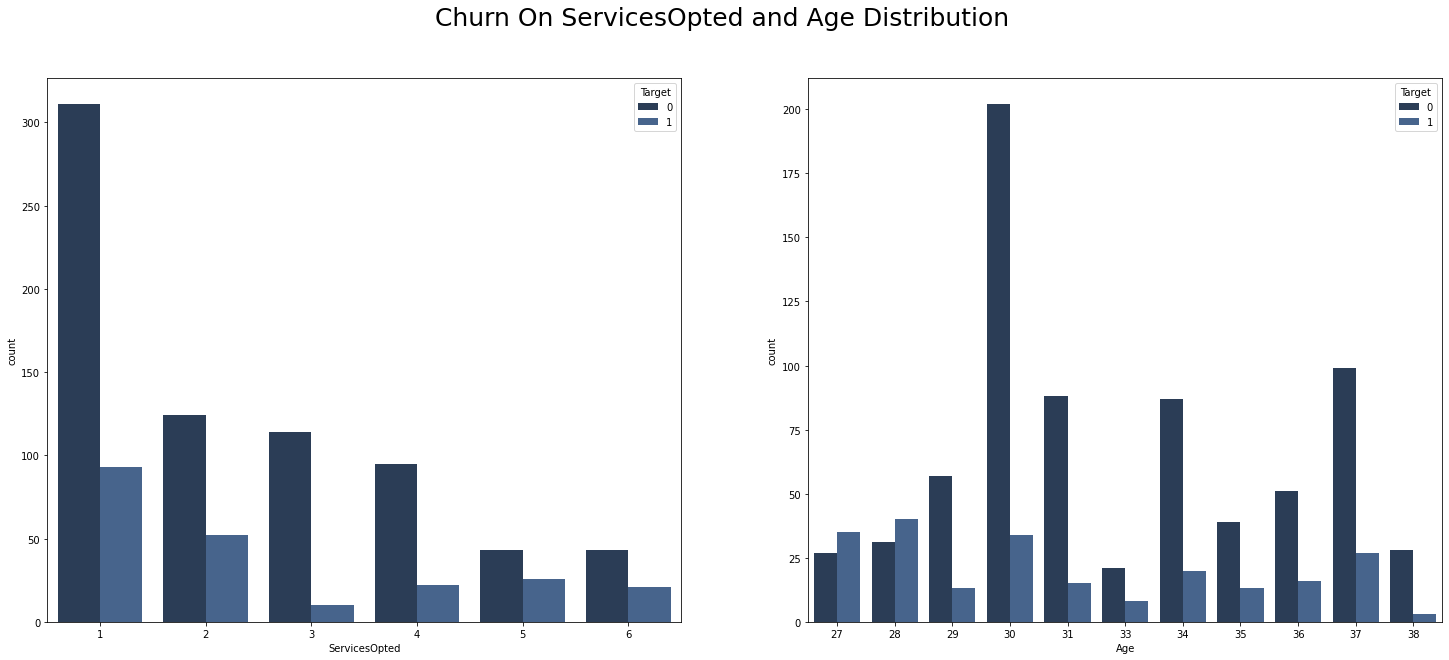

In [15]:
#distribusi age dan serviced opted terhadap target
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(25,10))
sns.countplot(data=df,x='ServicesOpted',hue='Target',ax=axes[0])
sns.countplot(data=df,x='Age',hue='Target',ax=axes[1])
plt.suptitle("Churn On ServicesOpted and Age Distribution", fontsize=25)
plt.show()



dari hasil diatas diketahui bahwa target = 1 merupakan target yang **churn** sedangkan target = 0 merupakan target yang memiliki kemungkinan **tidak churn**.
customer yang kemungkinan churn merupakan customer dengan rata-rata berusia 27 sampai 28 tahun yang memiliki serviced opted 1-2 untuk churn dan tidak churn.


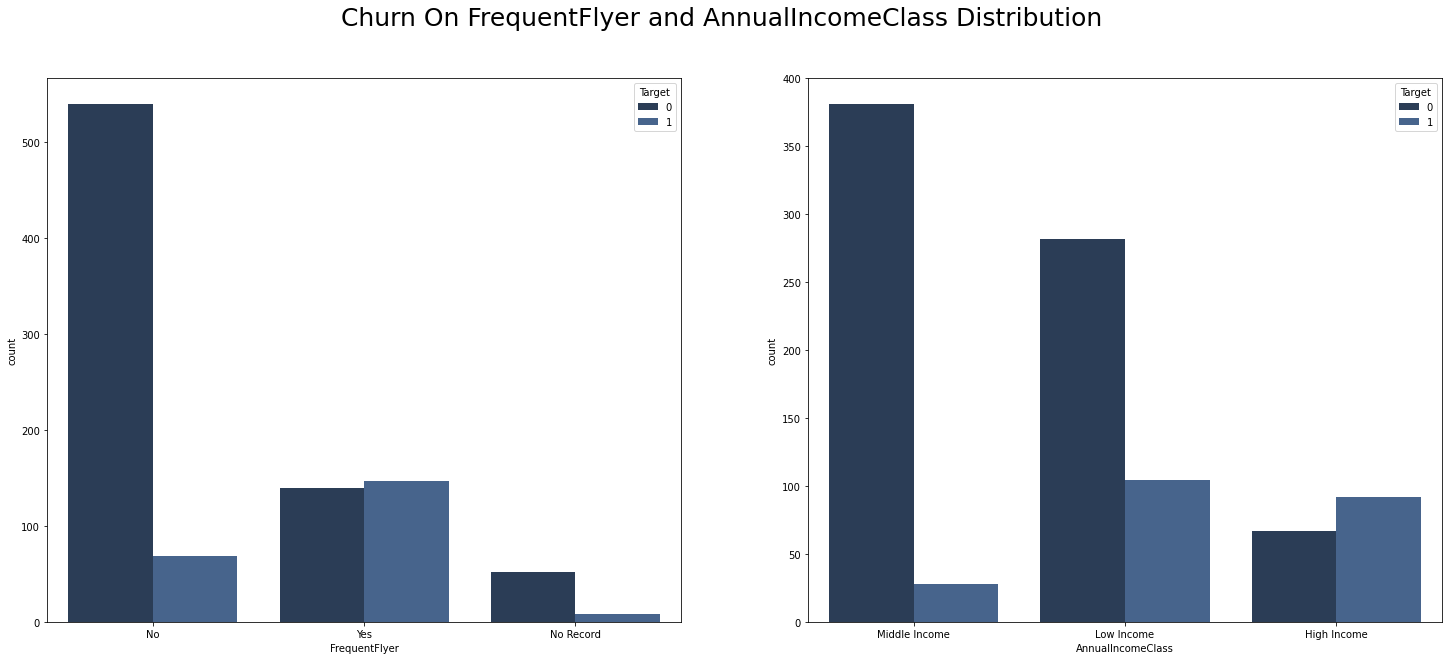

In [16]:
#distribusi target terhadap age
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(25,10))
sns.countplot(data=df,x='FrequentFlyer',hue='Target',ax=axes[0])
sns.countplot(data=df,x='AnnualIncomeClass',hue='Target',ax=axes[1])
plt.suptitle("Churn On FrequentFlyer and AnnualIncomeClass Distribution", fontsize=25)
plt.show()

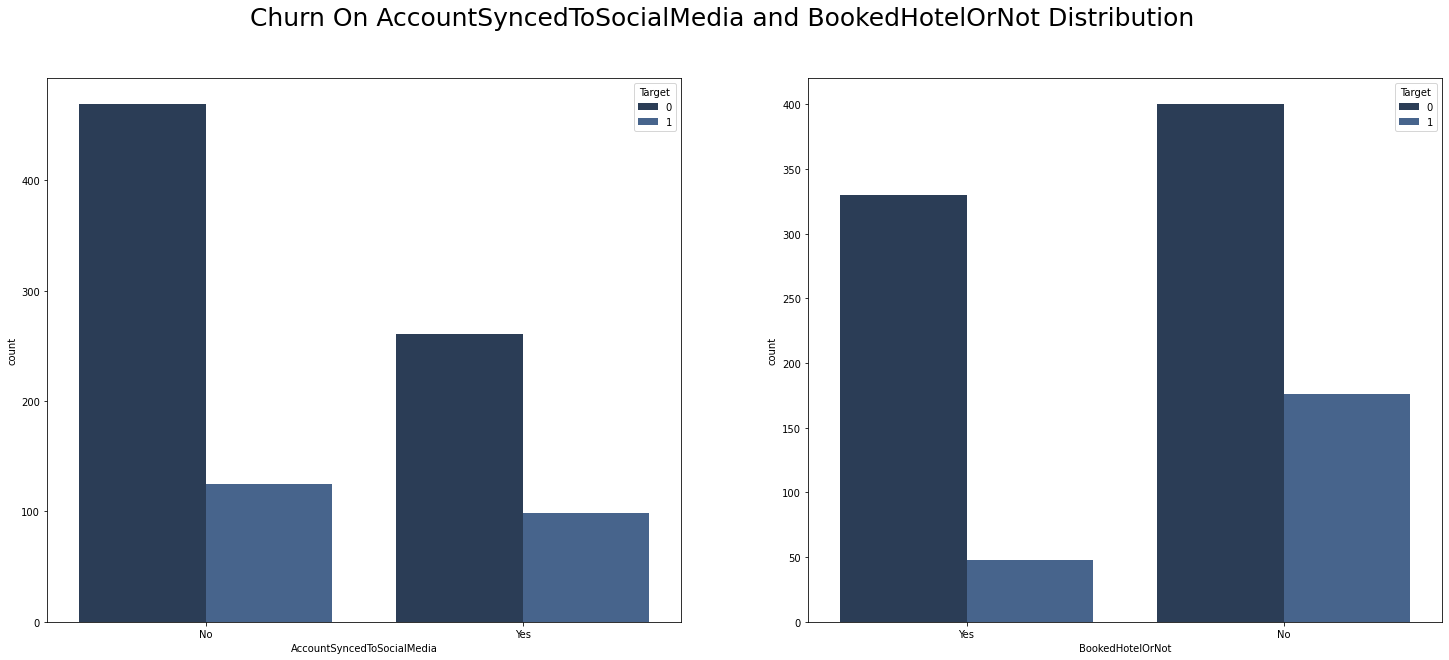

In [17]:
#distribusi target terhadap age
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(25,10))
sns.countplot(data=df,x='AccountSyncedToSocialMedia',hue='Target',ax=axes[0])
sns.countplot(data=df,x='BookedHotelOrNot',hue='Target',ax=axes[1])
plt.suptitle("Churn On AccountSyncedToSocialMedia and BookedHotelOrNot Distribution", fontsize=25)
plt.show()

dari hasil diatas diketahui bahwa target = 1 merupakan target yang **churn** sedangkan target = 0 merupakan target yang memiliki kemungkinan **tidak churn**. customer yang churn merupakan customer yang mendapatkan frequentflyer, dengan pendaptan low income.
Account syncing to social media and churn are both in positive and negative. It means that both side are using social media.
People who booked the hotel and churn are in negative correlation. It means that booking the hotel may be deterrence for churn.

# FEATURE ENCODING

In [18]:
df1 = df
df1['FrequentFlyer_l'] = df1['FrequentFlyer'].astype('category')
df1['AnnualIncomeClass_l'] = df1['AnnualIncomeClass'].astype('category')

#Label Encoding
df1['AccountSyncedToSocialMedia_l'] = df1['AccountSyncedToSocialMedia'].astype('category').cat.codes
df1['BookedHotelOrNot_l'] = df1['BookedHotelOrNot'].astype('category').cat.codes
df2=pd.get_dummies(df1, columns=['FrequentFlyer','AnnualIncomeClass'])
df2

,Age,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target,FrequentFlyer_l,AnnualIncomeClass_l,AccountSyncedToSocialMedia_l,BookedHotelOrNot_l,FrequentFlyer_No,FrequentFlyer_No Record,FrequentFlyer_Yes,AnnualIncomeClass_High Income,AnnualIncomeClass_Low Income,AnnualIncomeClass_Middle Income
0,34,6,No,Yes,0,No,Middle Income,0,1,1,0,0,0,0,1
1,34,5,Yes,No,1,Yes,Low Income,1,0,0,0,1,0,1,0
2,37,3,Yes,No,0,No,Middle Income,1,0,1,0,0,0,0,1
3,30,2,No,No,0,No,Middle Income,0,0,1,0,0,0,0,1
4,30,1,No,No,0,No,Low Income,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
949,31,1,No,No,0,Yes,Low Income,0,0,0,0,1,0,1,0
950,30,5,No,Yes,0,No,Middle Income,0,1,1,0,0,0,0,1
951,37,4,No,No,0,No,Middle Income,0,0,1,0,0,0,0,1
952,30,1,Yes,Yes,0,No,Low Income,1,1,1,0,0,0,1,0


Text(0.5, 1.0, 'Correlation each Features')

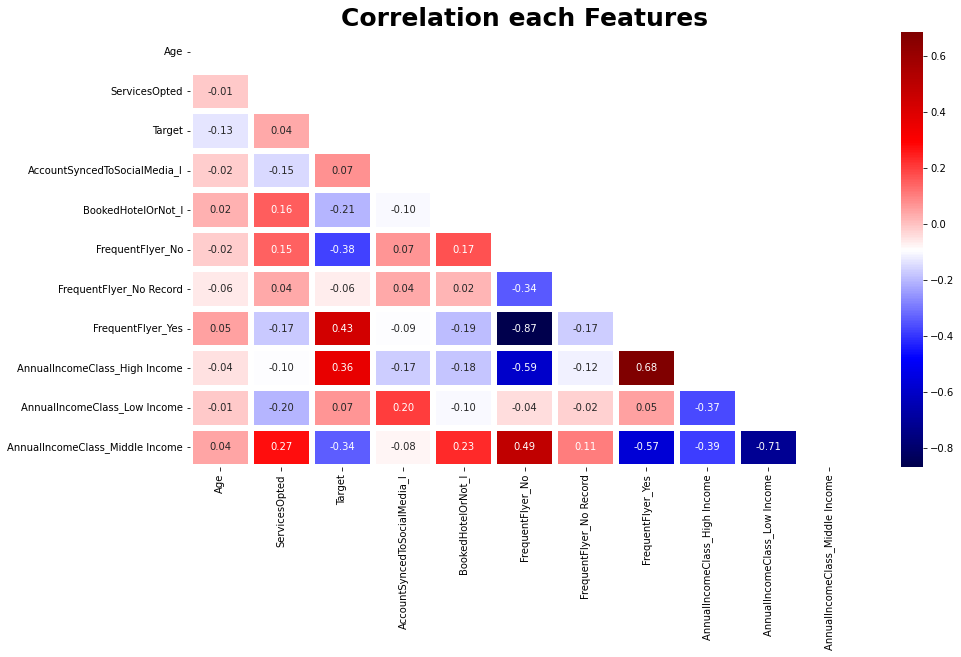

In [19]:
plt.figure(figsize=(15, 8))

mask = np.triu(np.ones_like(df2.corr(), dtype=bool))

sns.heatmap(df2.corr(),annot=True,fmt='.2f',linewidths=5,linecolor='white',cmap='seismic',mask=mask)
plt.title('Correlation each Features',weight='bold',fontsize=25)
#fig.savefig('myimage.png', format='png', dpi=1200)

Dari hasil heatmap diketahui bahwa korelasi yang cukup baik adalah feature Age, FrequentFlyer_No, FrequentFlyer_Yes, AnnualIncomeClass_High Income, AnnualIncomeClass_Middle Income, BookedHotelOrNot_No, BookedHotelOrNot_Yes sehingga feature lainnya di drop

In [20]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   Age                              954 non-null    int64   
 1   ServicesOpted                    954 non-null    int64   
 2   AccountSyncedToSocialMedia       954 non-null    object  
 3   BookedHotelOrNot                 954 non-null    object  
 4   Target                           954 non-null    int64   
 5   FrequentFlyer_l                  954 non-null    category
 6   AnnualIncomeClass_l              954 non-null    category
 7   AccountSyncedToSocialMedia_l     954 non-null    int8    
 8   BookedHotelOrNot_l               954 non-null    int8    
 9   FrequentFlyer_No                 954 non-null    uint8   
 10  FrequentFlyer_No Record          954 non-null    uint8   
 11  FrequentFlyer_Yes                954 non-null    uint8   
 12  AnnualIn

In [21]:
df2.drop(columns=['AccountSyncedToSocialMedia','BookedHotelOrNot','FrequentFlyer_l','AnnualIncomeClass_l'], inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   Age                              954 non-null    int64
 1   ServicesOpted                    954 non-null    int64
 2   Target                           954 non-null    int64
 3   AccountSyncedToSocialMedia_l     954 non-null    int8 
 4   BookedHotelOrNot_l               954 non-null    int8 
 5   FrequentFlyer_No                 954 non-null    uint8
 6   FrequentFlyer_No Record          954 non-null    uint8
 7   FrequentFlyer_Yes                954 non-null    uint8
 8   AnnualIncomeClass_High Income    954 non-null    uint8
 9   AnnualIncomeClass_Low Income     954 non-null    uint8
 10  AnnualIncomeClass_Middle Income  954 non-null    uint8
dtypes: int64(3), int8(2), uint8(6)
memory usage: 29.9 KB


# MODEL BUILDING

In [22]:
features = df2.drop(columns = 'Target')
from sklearn.preprocessing import MinMaxScaler, StandardScaler
for var in features:
    df2[var]= MinMaxScaler().fit_transform(df2[var].values.reshape(len(df2), 1))

In [23]:
X = df2.drop(['Target'], axis=1)
y = df2['Target']

In [24]:
Xtrain, Xtest, ytrain, ytest = train_test_split (X, y, test_size=1/3, random_state=42)

In [25]:
## Handling class imbalance
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
Xtrain_oversampled, ytrain_oversampled = sm.fit_sample(Xtrain, ytrain)
Xtrain = pd.DataFrame(Xtrain_oversampled, columns=Xtrain.columns)
ytrain = pd.Series(ytrain_oversampled)

In [26]:
print('Shape of x Training set : ',Xtrain.shape )
print('Shape of x test set : ',Xtest.shape )
print('Shape of y training set : ',ytrain.shape )
print('Shape of y test set : ',ytest.shape )
print('Percentage of classes in training set:\n',ytrain.value_counts(normalize=True)*100)
print('Percentage of classes in test set:\n',ytest.value_counts(normalize=True)*100)

Shape of x Training set :  (978, 10)
Shape of x test set :  (318, 10)
Shape of y training set :  (978,)
Shape of y test set :  (318,)
Percentage of classes in training set:
 1    50.0
0    50.0
dtype: float64
Percentage of classes in test set:
 0    75.786164
1    24.213836
Name: Target, dtype: float64


In [27]:
## membuat function untuk melakukan evaluasi pada setiap model
def eval_classification(model, Xtrain, ytrain, Xtest, ytest, threshold=0.5, flag=True, roc=True ):
    score=[] 
    
    pred_train = (model.predict_proba(Xtrain)[:,1]>threshold)
    pred_test = (model.predict_proba(Xtest)[:,1]>threshold)

    pred_train = np.round(pred_train)
    pred_test = np.round(pred_test)
    
    train_acc = accuracy_score(pred_train,ytrain)
    test_acc = accuracy_score(pred_test,ytest)
    
    train_recall = recall_score(ytrain,pred_train)
    test_recall = recall_score(ytest,pred_test)
    
    train_precision = precision_score(ytrain,pred_train)
    test_precision = precision_score(ytest,pred_test)
    
    train_f1 = f1_score(ytrain,pred_train)
    test_f1 = f1_score(ytest,pred_test)
    
    
    score.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1,pred_train,pred_test))
        
    
    if flag == True: 
        #print("Accuracy on training set : ",accuracy_score(pred_train,ytrain))
        print("Accuracy on test set : ",accuracy_score(pred_test,ytest))
        #print("Recall on training set : ",recall_score(ytrain,pred_train))
        print("Recall on test set : ",recall_score(ytest,pred_test))
        #print("Precision on training set : ",precision_score(ytrain,pred_train))
        print("Precision on test set : ",precision_score(ytest,pred_test))
        #print("F1 on training set : ",f1_score(ytrain,pred_train))
        print("F1 on test set : ",f1_score(ytest,pred_test))
   
    if roc == True:
        pred_train_prob = model.predict_proba(Xtrain)[:,1]
        pred_test_prob = model.predict_proba(Xtest)[:,1]
        #print("ROC-AUC Score on training set : ",roc_auc_score(ytrain,pred_train))
        print("ROC-AUC Score on test set : ",roc_auc_score(ytest,pred_test))
    
    return score # returning the list with train and test scores

In [28]:
## Fungsi untuk menyimpan hasil evaluasi pada masing-masing list yang sudah disediakan
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []

def add_score_model(score):
    acc_train.append(score[0])
    acc_test.append(score[1])
    recall_train.append(score[2])
    recall_test.append(score[3])
    precision_train.append(score[4])
    precision_test.append(score[5])
    f1_train.append(score[6])
    f1_test.append(score[7])

In [29]:
## Fungsi untuk mengeluarkan confusion matrix
def confusion_matrix(model,test_X,y_actual,i,seg,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    test_X: test set
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(test_X)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[1,0])
    df_cm = pd.DataFrame(cm, index = [i for i in ['Actual - Purchased', 'Actual - Not Purchased']],
                  columns = [i for i in ['Predicted - Purchased','Predicted - Not Purchased']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='', ax=axes[i], cmap='Blues').set(title='Confusion Matrix of {} Set'.format(seg))

In [30]:
## fungsi untuk show feature importance
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8),  color='green', align='center')
    ax.invert_yaxis()

    plt.title('Feature Importances')
    plt.xlabel('Relative Importance')


### Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42)
model.fit(Xtrain, ytrain)

logistic_regression_score = eval_classification(model, Xtrain, ytrain, Xtest, ytest)
add_score_model(logistic_regression_score)

Accuracy on test set :  0.7452830188679245
Recall on test set :  0.7532467532467533
Precision on test set :  0.48333333333333334
F1 on test set :  0.5888324873096447
ROC-AUC Score on test set :  0.7479926712291858


In [32]:
print('Train score: ' + str(model.score(Xtrain, ytrain))) #accuracy
print('Test score:' + str(model.score(Xtest, ytest))) #accuracy

Train score: 0.7627811860940695
Test score:0.7452830188679245


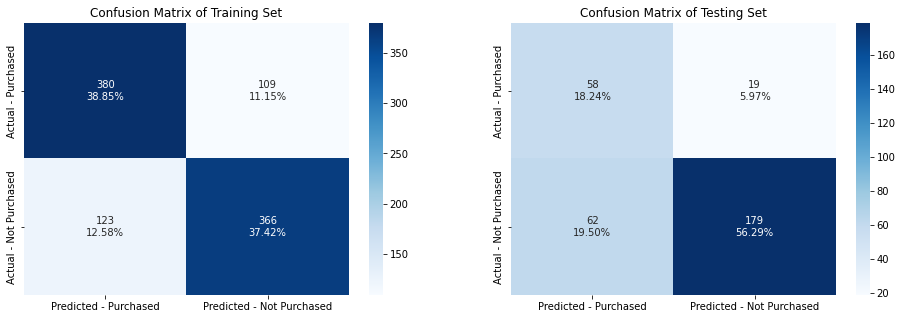

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

In [33]:
fig, axes = plt.subplots(1,2,figsize=(16,5));
confusion_matrix(model, Xtrain, ytrain, i = 0, seg = 'Training')
confusion_matrix(model, Xtest, ytest, i = 1, seg = 'Testing')

# Logistic Regression - GridSearchCV

In [34]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# List Hyperparameters yang akan diuji dan scorer
penalty = ['l2','l1','elasticnet','none']
C = [0.0001, 0.001, 0.002] # Inverse of regularization strength; smaller values specify stronger regularization.
hyperparameters = dict(penalty=penalty, C=C)
scorer = metrics.make_scorer(metrics.precision_score)

# Inisiasi model
logres = LogisticRegression(random_state=42) # Init Logres dengan Gridsearch, cross validation = 5
grid_obj = GridSearchCV(logres, hyperparameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(Xtrain, ytrain)
logres = grid_obj.best_estimator_

# Fitting Model & Evaluation
logres.fit(Xtrain, ytrain)
logregrandom_score = eval_classification(logres, Xtrain, ytrain, Xtest, ytest)
add_score_model(logregrandom_score)

Accuracy on test set :  0.7421383647798742
Recall on test set :  0.7532467532467533
Precision on test set :  0.4793388429752066
F1 on test set :  0.5858585858585859
ROC-AUC Score on test set :  0.7459179824325053


In [35]:
print('Best algorithm:', model.get_params()['penalty'])
print('Best C:', model.get_params()['C'])


Best algorithm: l2
Best C: 1.0


In [36]:
print('Train score: ' + str(model.score(Xtrain, ytrain))) #accuracy
print('Test score:' + str(model.score(Xtest, ytest))) #accuracy

Train score: 0.7627811860940695
Test score:0.7452830188679245


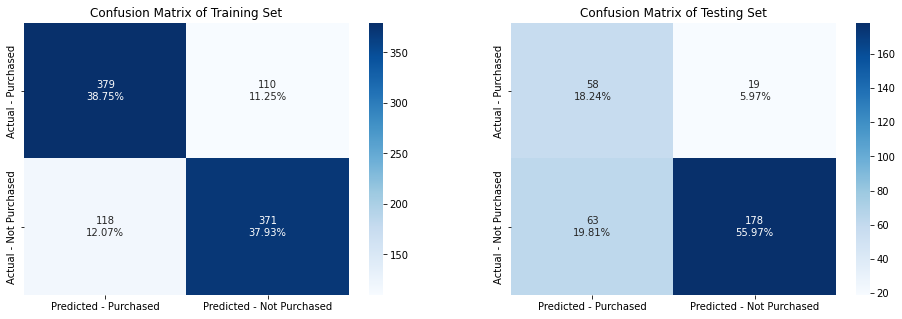

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

In [37]:
fig, axes = plt.subplots(1,2,figsize=(16,5));
confusion_matrix(logres, Xtrain, ytrain, i = 0, seg = 'Training')
confusion_matrix(logres, Xtest, ytest, i = 1, seg = 'Testing')

# kNN

In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(Xtrain, ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [39]:
 knn_score = eval_classification(knn, Xtrain, ytrain, Xtest, ytest)
 add_score_model(knn_score)

Accuracy on test set :  0.8207547169811321
Recall on test set :  0.7402597402597403
Precision on test set :  0.6063829787234043
F1 on test set :  0.6666666666666666
ROC-AUC Score on test set :  0.7933663846526917


In [40]:
print('Train score: ' + str(model.score(Xtrain, ytrain))) #accuracy
print('Test score:' + str(model.score(Xtest, ytest))) #accuracy

Train score: 0.7627811860940695
Test score:0.7452830188679245


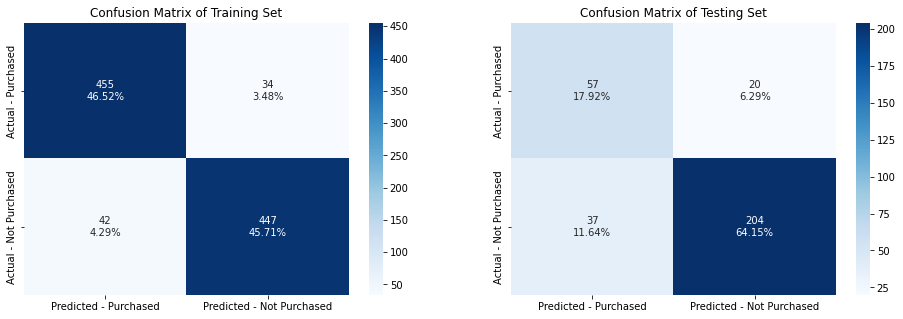

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

In [41]:
fig, axes = plt.subplots(1,2,figsize=(16,5));
confusion_matrix(knn, Xtrain, ytrain, i = 0, seg = 'Training')
confusion_matrix(knn, Xtest, ytest, i = 1, seg = 'Testing')

# kNN - GridSearchCV

In [42]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# List of hyperparameter
n_neighbors = list(range(1,15))
p=[1,2]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm)
scorer = metrics.make_scorer(metrics.precision_score)

# Inisiasi model
knnt = KNeighborsClassifier()
grid_obj = GridSearchCV(knnt, hyperparameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(Xtrain, ytrain)
knnt = grid_obj.best_estimator_
print(grid_obj)
# Fit Model & Evaluasi
knnt.fit(Xtrain, ytrain)
knnt_score = eval_classification(knnt, Xtrain, ytrain, Xtest, ytest)
add_score_model(knnt_score)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14],
                         'p': [1, 2]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(precision_score), verbose=0)
Accuracy on test set :  0.8679245283018868
Recall on test set :  0.6233766233766234
Precision on test set :  0.7868852459016393
F1 on test set :  0.6956521739130435
ROC-AUC Score on test

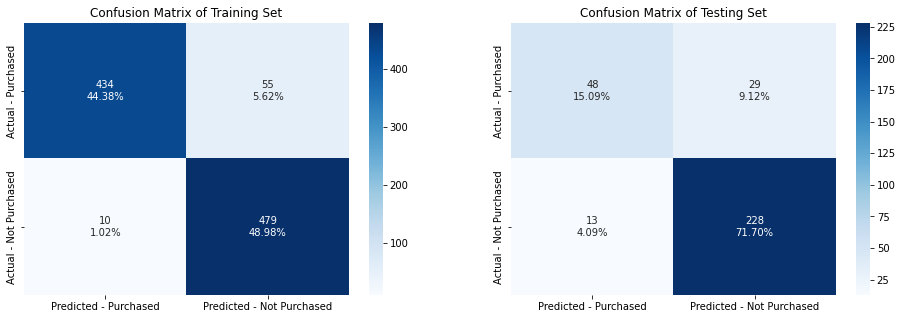

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

In [43]:
fig, axes = plt.subplots(1,2,figsize=(16,5));
confusion_matrix(knnt, Xtrain, ytrain, i = 0, seg = 'Training')
confusion_matrix(knnt, Xtest, ytest, i = 1, seg = 'Testing')

In [44]:
#show_feature_importance(knnt)

# Decision Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(Xtrain,ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [46]:
dtree_score = eval_classification(dtree, Xtrain, ytrain, Xtest, ytest)
add_score_model(dtree_score)

Accuracy on test set :  0.9119496855345912
Recall on test set :  0.8051948051948052
Precision on test set :  0.8266666666666667
F1 on test set :  0.8157894736842106
ROC-AUC Score on test set :  0.8756264482405561


In [47]:
## visualisasi decision tree
feature_names = list(Xtrain.columns)
print(feature_names)
from sklearn import tree

['Age', 'ServicesOpted', 'AccountSyncedToSocialMedia_l', 'BookedHotelOrNot_l', 'FrequentFlyer_No', 'FrequentFlyer_No Record', 'FrequentFlyer_Yes', 'AnnualIncomeClass_High Income', 'AnnualIncomeClass_Low Income', 'AnnualIncomeClass_Middle Income']


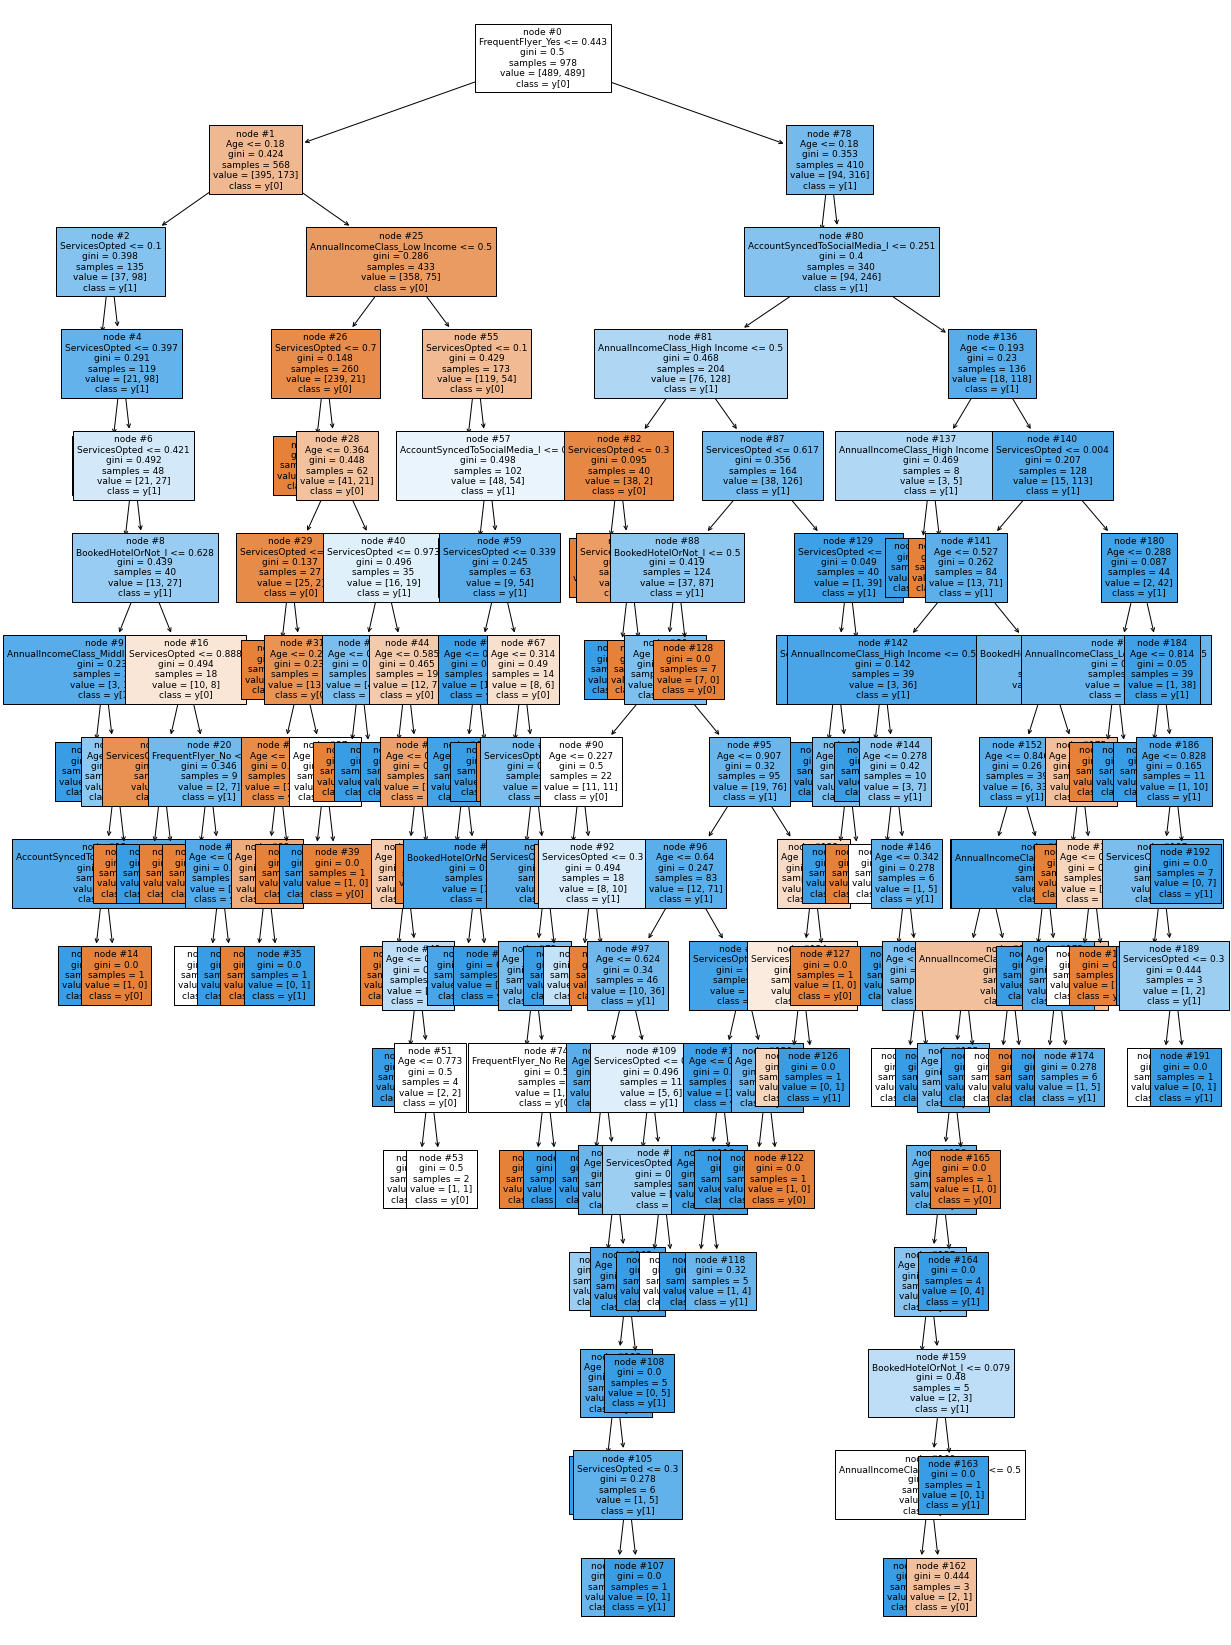

In [48]:
plt.figure(figsize=(20,30))
out = tree.plot_tree(dtree,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()
plt.show()

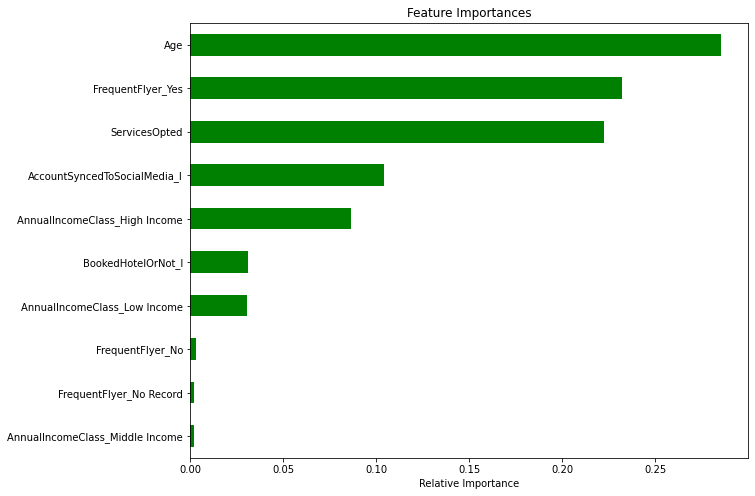

In [49]:
show_feature_importance(dtree)

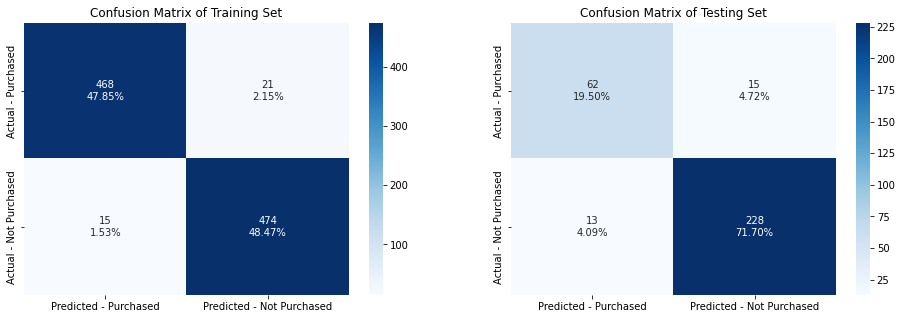

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

In [50]:
fig, axes = plt.subplots(1,2,figsize=(16,5));
confusion_matrix(dtree, Xtrain, ytrain, i = 0, seg = 'Training')
confusion_matrix(dtree, Xtest, ytest, i = 1, seg = 'Testing')

# Dtree - GridSearchCV

In [51]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
dtreet = DecisionTreeClassifier(class_weight={0:0.19,1:0.81},random_state=42)

# List of hyperparameter
max_depth = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features
                      )
scorer = metrics.make_scorer(metrics.precision_score) 

# Init model
grid_obj = RandomizedSearchCV(dtreet, hyperparameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(Xtrain, ytrain)
dtreet = grid_obj.best_estimator_

# Fit Model & Evaluasi
dtreet.fit(Xtrain, ytrain)
dtreet_score = eval_classification(dtreet, Xtrain, ytrain, Xtest, ytest)
add_score_model(dtreet_score)


Accuracy on test set :  0.710691823899371
Recall on test set :  0.9090909090909091
Precision on test set :  0.45161290322580644
F1 on test set :  0.603448275862069
ROC-AUC Score on test set :  0.7781969068276122


['Age', 'ServicesOpted', 'AccountSyncedToSocialMedia_l', 'BookedHotelOrNot_l', 'FrequentFlyer_No', 'FrequentFlyer_No Record', 'FrequentFlyer_Yes', 'AnnualIncomeClass_High Income', 'AnnualIncomeClass_Low Income', 'AnnualIncomeClass_Middle Income']


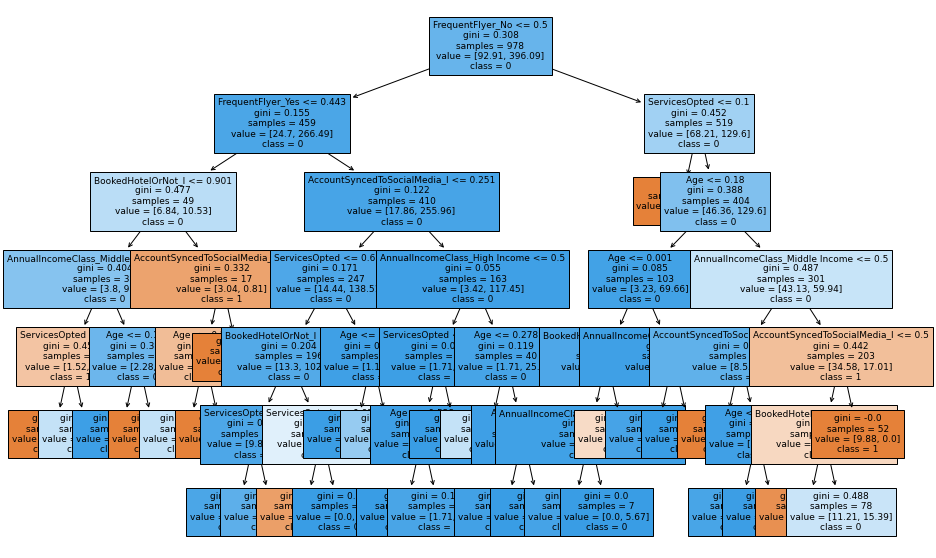

In [52]:
## visualisasi decision tree
feature_names = list(Xtrain.columns)
print(feature_names)
from sklearn import tree

plt.figure(figsize=(15,10))
feature_names = Xtrain.columns
out = tree.plot_tree(dtreet,feature_names=feature_names,filled=True,fontsize=9,class_names=['1','0'])
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

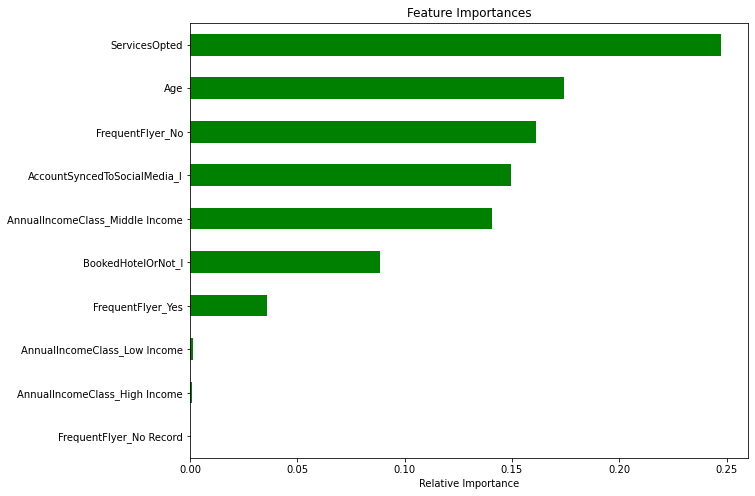

In [53]:
show_feature_importance(dtreet)

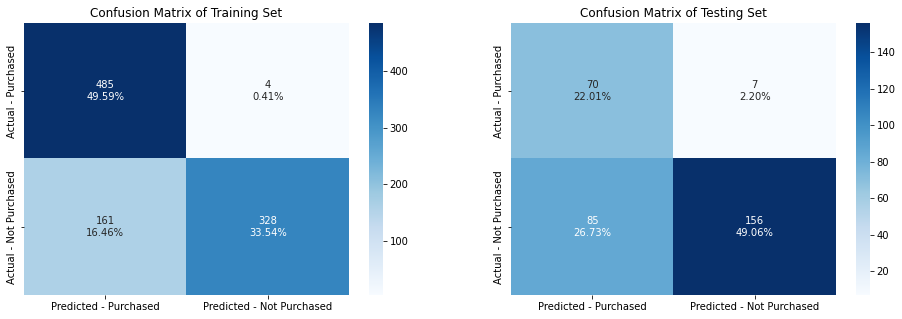

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

In [54]:
fig, axes = plt.subplots(1,2,figsize=(16,5));
confusion_matrix(dtreet, Xtrain, ytrain, i = 0, seg = 'Training')
confusion_matrix(dtreet, Xtest, ytest, i = 1, seg = 'Testing')

# Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(Xtrain,ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [56]:
rf_score = eval_classification(rf, Xtrain, ytrain, Xtest, ytest)
add_score_model(rf_score)

Accuracy on test set :  0.8647798742138365
Recall on test set :  0.7532467532467533
Precision on test set :  0.7073170731707317
F1 on test set :  0.7295597484276729
ROC-AUC Score on test set :  0.8268308455030448


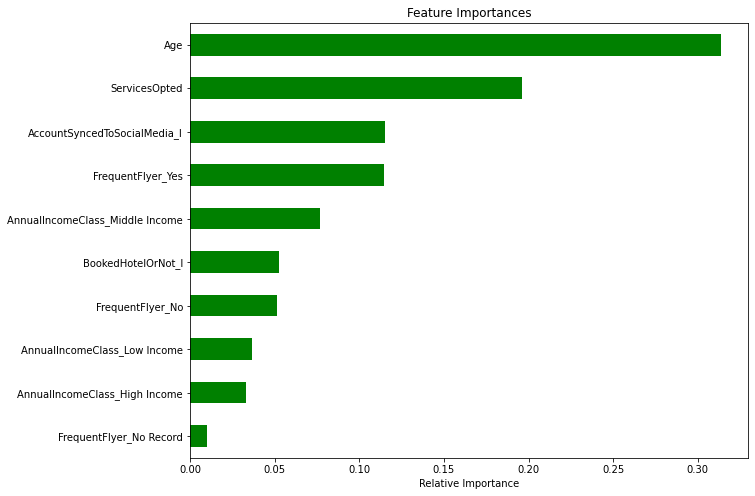

In [57]:
show_feature_importance(rf)

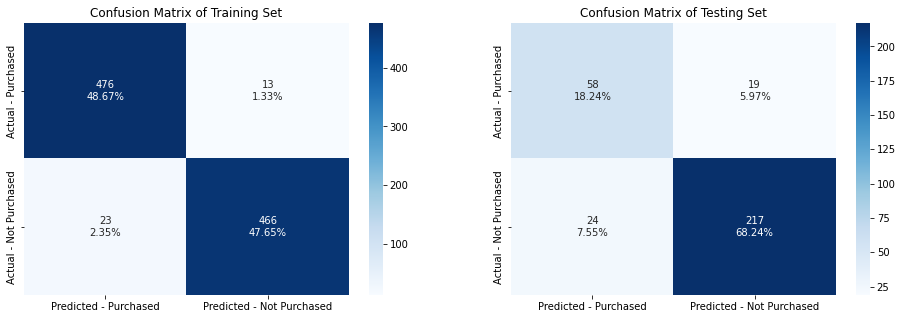

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

In [58]:
fig, axes = plt.subplots(1,2,figsize=(16,5));
confusion_matrix(rf, Xtrain, ytrain, i = 0, seg = 'Training')
confusion_matrix(rf, Xtest, ytest, i = 1, seg = 'Testing')

# Random Forest - RandomizedSearchCV

In [59]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#List Hyperparameters yang akan diuji
hyperparameters = dict(
                       n_estimators = [int(x) for x in np.linspace(start = 10, stop = 50, num = 10)], # Jumlah subtree 
                       bootstrap = [True, False], # Apakah pakai bootstrapping atau tidak
                       criterion = ['gini','entropy'],
                       max_depth = [13,14,15,16,17,18,19,20,21],  # Maximum kedalaman tree
                       min_samples_split = [1.0,1.5,2,2.5], # Jumlah minimum samples pada node agar boleh di split menjadi leaf baru
                       min_samples_leaf = [1,2,3,4], # Jumlah minimum samples pada leaf agar boleh terbentuk leaf baru
                       max_features = ['auto', 'sqrt', 'log2'], # Jumlah feature yg dipertimbangkan pada masing-masing split
                       n_jobs = [-1], # Core untuk parallel computation. -1 untuk menggunakan semua core
                      )

# Init Model
rf = RandomForestClassifier(random_state=42)
rft = RandomizedSearchCV(rf, hyperparameters, cv=5, random_state=42, scoring='precision')


# Fit Model & Evaluasi
rft.fit(Xtrain,ytrain)
rft_score = eval_classification(rft, Xtrain, ytrain, Xtest, ytest)
add_score_model(rft_score)

Accuracy on test set :  0.8710691823899371
Recall on test set :  0.7142857142857143
Precision on test set :  0.7432432432432432
F1 on test set :  0.7284768211920529
ROC-AUC Score on test set :  0.8177237700059278


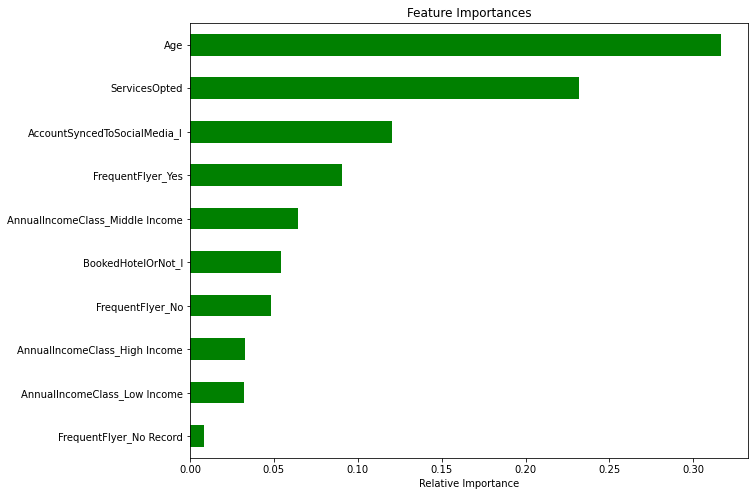

In [60]:
show_feature_importance(rft.best_estimator_)

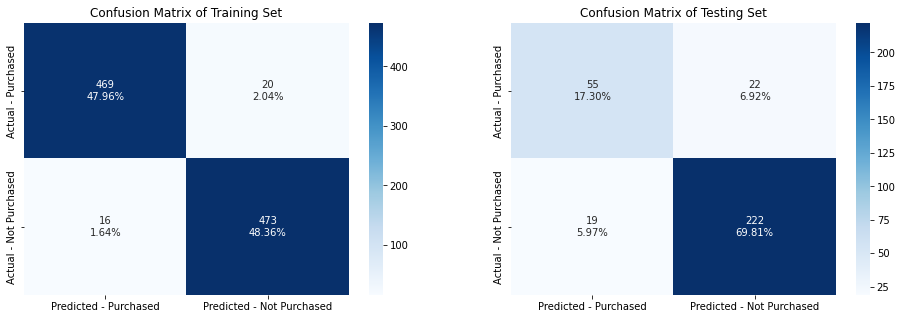

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

In [61]:
fig, axes = plt.subplots(1,2,figsize=(16,5));
confusion_matrix(rft, Xtrain, ytrain, i = 0, seg = 'Training')
confusion_matrix(rft, Xtest, ytest, i = 1, seg = 'Testing')

# Adaboost

In [62]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier(random_state=42)
ab.fit(Xtrain,ytrain)

ab_score = eval_classification(ab, Xtrain, ytrain, Xtest, ytest)
add_score_model(ab_score)

Accuracy on test set :  0.8553459119496856
Recall on test set :  0.8831168831168831
Precision on test set :  0.6476190476190476
F1 on test set :  0.7472527472527473
ROC-AUC Score on test set :  0.8647949560812631


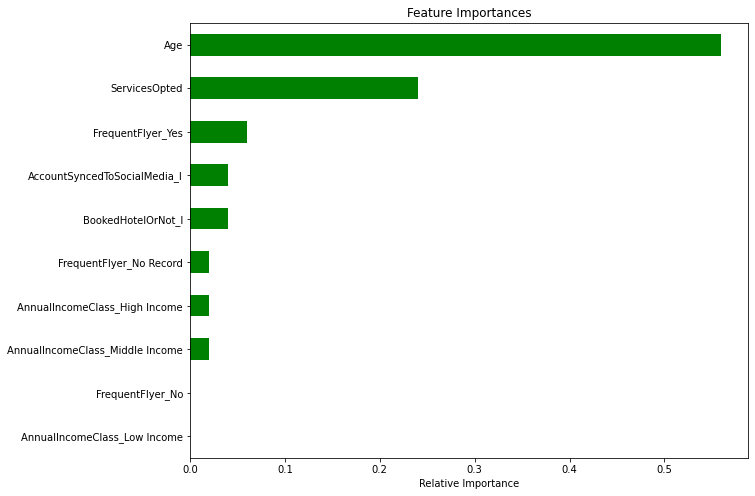

In [63]:
show_feature_importance(ab)

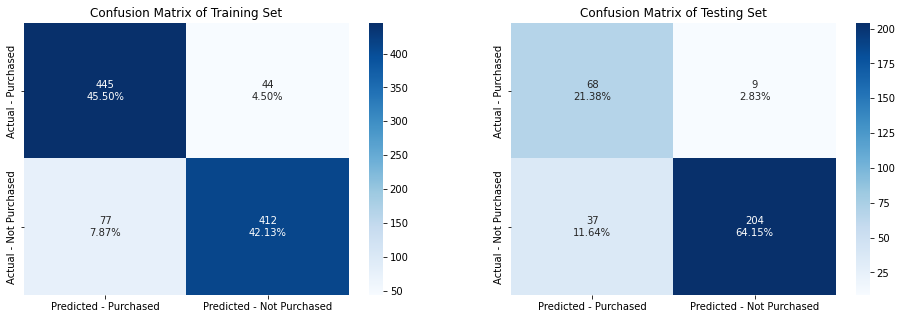

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

In [64]:
fig, axes = plt.subplots(1,2,figsize=(16,5));
confusion_matrix(ab, Xtrain, ytrain, i = 0, seg = 'Training')
confusion_matrix(ab, Xtest, ytest, i = 1, seg = 'Testing')

# Adaboost - RandomizedSearchCV

In [65]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

# List of hyperparameter
hyperparameters = dict(n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)], # Jumlah iterasi
                       learning_rate = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 20)],  
                       algorithm = ['SAMME', 'SAMME.R']
                      )

# Init model
abt = AdaBoostClassifier(random_state=42)
abt = RandomizedSearchCV(abt, hyperparameters, random_state=42, cv=5, scoring='precision')
abt.fit(Xtrain,ytrain)


# Fit Model & Evaluasi
abt.fit(Xtrain,ytrain)
abt_score = eval_classification(abt, Xtrain, ytrain, Xtest, ytest)
add_score_model(abt_score)

Accuracy on test set :  0.8522012578616353
Recall on test set :  0.8571428571428571
Precision on test set :  0.6470588235294118
F1 on test set :  0.7374301675977654
ROC-AUC Score on test set :  0.8538826318909306


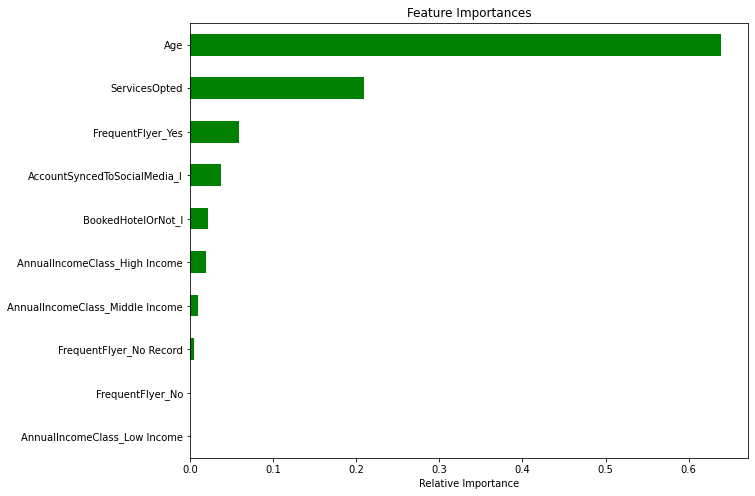

In [66]:
show_feature_importance(abt.best_estimator_)

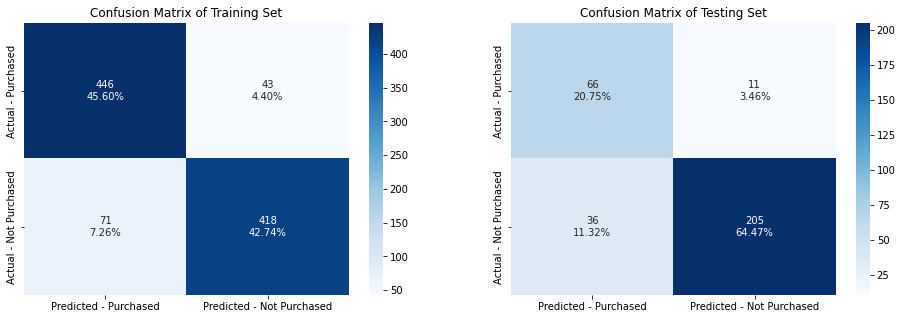

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

In [67]:
fig, axes = plt.subplots(1,2,figsize=(16,5));
confusion_matrix(abt, Xtrain, ytrain, i = 0, seg = 'Training')
confusion_matrix(abt, Xtest, ytest, i = 1, seg = 'Testing')

# XGBoost

In [68]:
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42)
xg.fit(Xtrain, ytrain)

xg_score = eval_classification(xg, Xtrain, ytrain, Xtest, ytest)
add_score_model(xg_score)

Accuracy on test set :  0.8710691823899371
Recall on test set :  0.8831168831168831
Precision on test set :  0.68
F1 on test set :  0.768361581920904
ROC-AUC Score on test set :  0.8751684000646656


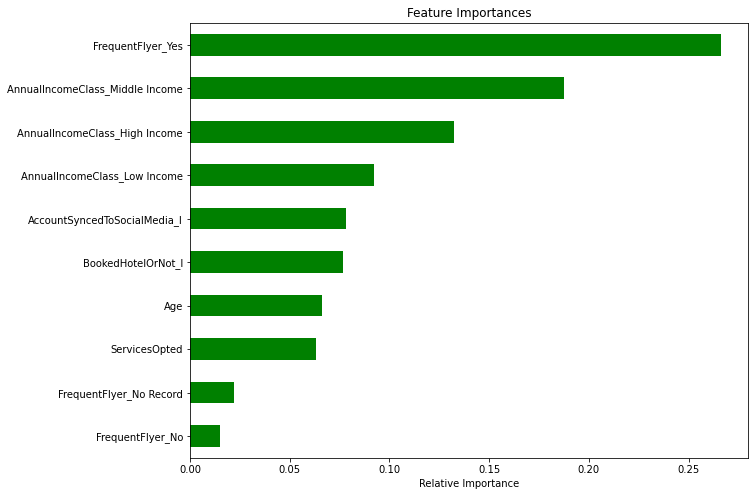

In [69]:
show_feature_importance(xg)

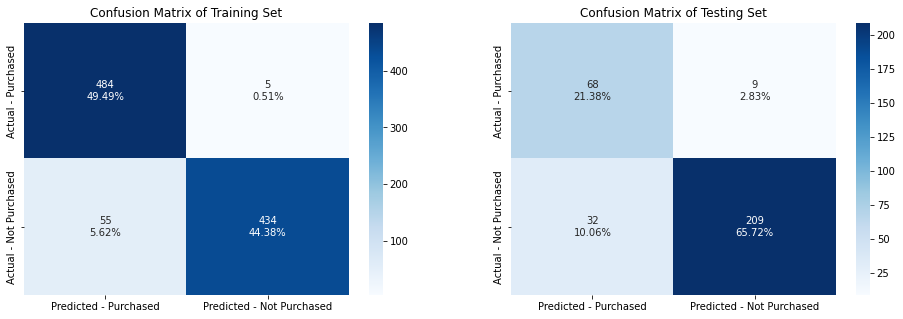

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

In [70]:
fig, axes = plt.subplots(1,2,figsize=(16,5));
confusion_matrix(xg, Xtrain, ytrain, i = 0, seg = 'Training')
confusion_matrix(xg, Xtest, ytest, i = 1, seg = 'Testing')

# XGBoost - RandomizedSearchCV

In [71]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
xgt = XGBClassifier(random_state=42)
xgt = RandomizedSearchCV(xgt, hyperparameters, cv=5, random_state=42, scoring='precision')

# Fit Model & Evaluasi
xgt.fit(Xtrain,ytrain)
xgt_score = eval_classification(xgt, Xtrain, ytrain, Xtest, ytest)
add_score_model(xgt_score)

Accuracy on test set :  0.8836477987421384
Recall on test set :  0.8311688311688312
Precision on test set :  0.7272727272727273
F1 on test set :  0.7757575757575759
ROC-AUC Score on test set :  0.8657918844640836


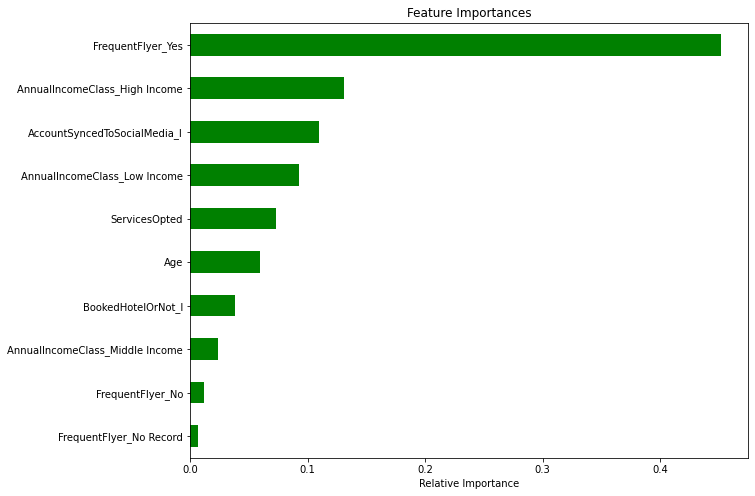

In [72]:
show_feature_importance(xgt.best_estimator_)

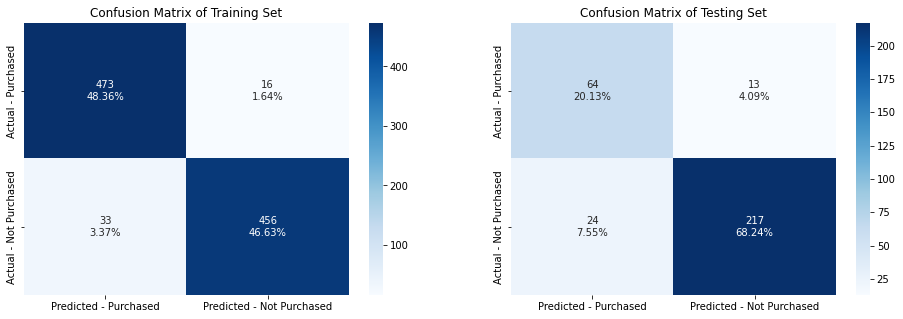

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

In [73]:
fig, axes = plt.subplots(1,2,figsize=(16,5));
confusion_matrix(xgt, Xtrain, ytrain, i = 0, seg = 'Training')
confusion_matrix(xgt, Xtest, ytest, i = 1, seg = 'Testing')

# compare

In [74]:
comparison_frame = pd.DataFrame({'Model':['Logistic Regression',
                                          'Logistic Regression - GridSearchCV',
                                          'kNN',
                                          'kNN - GridSearchCV',
                                          'Decision Tree',
                                          'Decision Tree - GridSearchCV',
                                          'Random Forest',
                                          'Random Forest - RandomizedSearchCV',
                                          'Adaboost',
                                          'Adaboost - RandomizedSearchCV', 
                                          'XGBoost',
                                          'XGBoost - RandomizedSearchCV'],
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,
                                          'Train_F1':f1_train,
                                          'Test_F1':f1_test  }) 

In [75]:
#Sorting models in decreasing order of test recall
comparison_frame.sort_values(by='Test_Precision',ascending=False).style.highlight_max(color = 'lightgreen', axis = 0).highlight_min(color = 'pink',axis = 0) 

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1,Test_F1
4,Decision Tree,0.963190,0.911950,0.957055,0.805195,0.968944,0.826667,0.962963,0.815789
3,kNN - GridSearchCV,0.933538,0.867925,0.887526,0.623377,0.977477,0.786885,0.930332,0.695652
7,Random Forest - RandomizedSearchCV,0.963190,0.871069,0.959100,0.714286,0.967010,0.743243,0.963039,0.728477
11,XGBoost - RandomizedSearchCV,0.949898,0.883648,0.967280,0.831169,0.934783,0.727273,0.950754,0.775758
6,Random Forest,0.963190,0.864780,0.973415,0.753247,0.953908,0.707317,0.963563,0.729560
10,XGBoost,0.938650,0.871069,0.989775,0.883117,0.897959,0.680000,0.941634,0.768362
8,Adaboost,0.876278,0.855346,0.910020,0.883117,0.852490,0.647619,0.880317,0.747253
9,Adaboost - RandomizedSearchCV,0.883436,0.852201,0.912065,0.857143,0.862669,0.647059,0.886680,0.737430
2,kNN,0.922290,0.820755,0.930470,0.740260,0.915493,0.606383,0.922921,0.666667
0,Logistic Regression,0.762781,0.745283,0.777096,0.753247,0.755467,0.483333,0.766129,0.588832
